In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
## preparing data

train_data = (pd.read_csv('train.csv')).values

X_train = train_data[:,1:]
y_train = train_data[:,0]

X_train = X_train/255.0
X_train = X_train.reshape((-1,28,28,1))

y_train = np_utils.to_categorical(y_train)

print(X_train.shape,y_train.shape)

(42000, 28, 28, 1) (42000, 10)


In [3]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))       ## generally kernel size is 3,3
model.add(MaxPooling2D((2,2)))                        ## shrinks hight and width keeping no. of channels same
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())           ## from here it will go to MLP

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

W0719 11:26:46.685135 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 11:26:46.705765 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 11:26:46.709407 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 11:26:46.733815 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0719 11:26:46.894119 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 11:26:46.933704 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
hist = model.fit(X_train,y_train,batch_size=70,epochs=10,validation_split=0.2,shuffle=True)

W0719 11:26:47.115745 140622045103872 deprecation.py:323] From /home/vinayak/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0719 11:26:47.232836 140622045103872 deprecation_wrapper.py:119] From /home/vinayak/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 15s 443us/step - loss: 0.2654 - acc: 0.9198 - val_loss: 0.0770 - val_acc: 0.9746
Epoch 2/10
33600/33600 [==============================] - 14s 412us/step - loss: 0.0706 - acc: 0.9781 - val_loss: 0.0570 - val_acc: 0.9818
Epoch 3/10
33600/33600 [==============================] - 14s 408us/step - loss: 0.0487 - acc: 0.9851 - val_loss: 0.0429 - val_acc: 0.9869
Epoch 4/10
33600/33600 [==============================] - 14s 417us/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0551 - val_acc: 0.9820
Epoch 5/10
33600/33600 [==============================] - 15s 433us/step - loss: 0.0323 - acc: 0.9894 - val_loss: 0.0456 - val_acc: 0.9851
Epoch 6/10
33600/33600 [==============================] - 15s 439us/step - loss: 0.0254 - acc: 0.9917 - val_loss: 0.0478 - val_acc: 0.9852
Epoch 7/10
33600/33600 [==============================] - 14s 427us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0

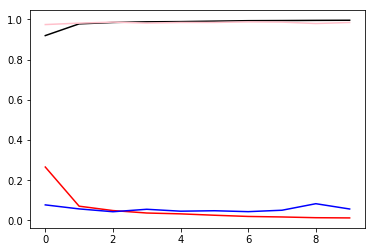

In [7]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.plot(hist.history['acc'], color='black')
plt.plot(hist.history['val_acc'], color='pink')
plt.show()